In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3 
!pip3 install konlpy==0.5.2
!JAVA_HOME="C:\Program Files\Java\jdk-17.0.1"

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

In [ ]:
from konlpy.tag import Okt
from collections import Counter

# Contents

* 1. READ TRAIN DATASETS
    
* 2. FEATURE ENGINEERING
   
* 3. MODEL TRAIN / INFERENCE
 
* 4. KEYWORD EXTRACTION

* 5. WORD CLOUD

# 1. READ TRAIN DATASETS

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI Spark/cafe_review.csv',encoding='utf-8-sig')

# 2. FEATURE ENGINEERING

* 한국어 불용어 사전에 등록된 단어들과 리뷰 데이터셋에서 긍/부정 키워드 분석에 관련없는 단어들을 불용어로 선언합니다.

In [ ]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()

review_stopwords = ['음식', '음식점', '사장', '사장님', '항상', '에스티', '진짜', '최고', '처음', '별로', '요청', '요기']

for word in review_stopwords:
  stopwords.append(word)

* 정규 표현식 처리, 명사 추출, 한글자 키워드 제거, 불용어 제거를 거치면서 긍/부정 키워드 분석에 효과적이도록 텍스트를 전처리 후 워드 임베딩을 진행합니다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['text'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

* 단어들이 몇 번씩이나 등장한지 확인합니다.

In [ ]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가게': 18,
 '가격': 33,
 '가기': 1,
 '가까이': 2,
 '가끔': 6,
 '가나': 1,
 '가능': 1,
 '가득': 4,
 '가라': 3,
 '가량': 1,
 '가로': 1,
 '가루': 4,
 '가방': 2,
 '가성': 7,
 '가시': 1,
 '가야': 1,
 '가요': 9,
 '가위': 1,
 '가을': 4,
 '가장': 7,
 '가족': 2,
 '가즈': 1,
 '가지': 13,
 '각거리': 1,
 '각자': 1,
 '간만': 1,
 '간반': 1,
 '간식': 11,
 '간첩': 1,
 '간혹': 1,
 '갈고': 1,
 '갈라': 1,
 '갈색': 1,
 '갈수록': 1,
 '감귤': 1,
 '감기': 1,
 '감덩': 1,
 '감동': 44,
 '감별': 1,
 '감사': 9,
 '감사용': 1,
 '감샤': 1,
 '감성': 1,
 '감수': 1,
 '감자': 1,
 '감전': 1,
 '감정': 1,
 '감탄': 1,
 '갑자기': 7,
 '강아지': 5,
 '강의': 1,
 '강조': 1,
 '강추': 2,
 '강츄': 1,
 '개꿀맛': 1,
 '개도': 3,
 '개봉': 1,
 '개선': 3,
 '개수': 2,
 '개시': 4,
 '개왓': 1,
 '개인': 6,
 '개입': 2,
 '개정': 1,
 '개존맛': 2,
 '거구': 1,
 '거기': 8,
 '거나': 4,
 '거도': 1,
 '거리': 5,
 '거린데': 1,
 '거무': 1,
 '거의': 21,
 '거지': 1,
 '거짓말': 1,
 '거틀': 1,
 '거품': 1,
 '걱정': 8,
 '건가': 11,
 '건강': 1,
 '건데': 2,
 '건물': 1,
 '건의': 1,
 '걸줌': 1,
 '검색': 2,
 '것디': 1,
 '겉바': 9,
 '게다가': 4,
 '게인': 1,
 '게일': 3,
 '겨우': 3,
 '겨울': 3,
 '결과': 1,
 '결심': 1,
 '결제': 4,
 '겹겹이': 3,
 '겹치': 1,
 '경우': 2,
 

* 각 워드가 텍스트 내에서 얼마나 중요한지 확인하기 위해 TF-IDF를 적용해 각 워드에 가중치를 부여합니다. 

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

print(tf_idf_vect)

  (0, 1959)	0.3114454674628997
  (0, 1610)	0.20155320033252125
  (0, 1408)	0.4494770314346105
  (0, 1265)	0.25352475497929305
  (0, 905)	0.3195047750724007
  (0, 877)	0.37031539932670754
  (0, 768)	0.28505494952570326
  (0, 101)	0.33727274417449793
  (0, 39)	0.40230287169406626
  (1, 1764)	0.8718510734147722
  (1, 580)	0.48977107487632354
  (2, 1449)	0.5024873083770192
  (2, 1092)	0.5942407729215153
  (2, 905)	0.19604088957854848
  (2, 662)	0.2099068564181449
  (2, 495)	0.3169432635989885
  (2, 174)	0.45982437692969735
  (3, 1557)	0.8403469993641379
  (3, 905)	0.5420488175982763
  (4, 1690)	0.7567399981247043
  (4, 905)	0.2765950705211072
  (4, 662)	0.5923172648181431
  (5, 1610)	0.39616345040502243
  (5, 1536)	0.7779977417127881
  (5, 905)	0.31400174719314394
  :	:
  (1354, 203)	0.15676738882907104
  (1354, 104)	0.2196463621363519
  (1355, 2099)	0.38863079493063474
  (1355, 1541)	0.3054625133895322
  (1355, 1219)	0.7772615898612695
  (1355, 889)	0.3318596107659237
  (1355, 861)	0.2034

각 레이블의 개수를 파악한 후 일반적으로 적은 부정적인 리뷰 개수에 맞춰 샘플링을 진행합니다.

In [ ]:
df['label'].value_counts()

1    940
0    417
Name: label, dtype: int64

In [ ]:
sample_num = df['label'].value_counts()[0]

In [ ]:
positive_random_idx = df[df['label']==1].sample(sample_num, random_state=12).index.tolist()
negative_random_idx = df[df['label']==0].sample(sample_num, random_state=12).index.tolist()

# 3. MODEL TRAIN / INFERENCE

* 모델은 Logistic Regression을 사용합니다.

In [ ]:
from sklearn.model_selection import train_test_split
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['label'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
x_test.shape

(209, 2115)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

* 비교적 정확하게 추론한 것을 확인할 수 있습니다.

In [ ]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.84
precision: 0.91
recall: 0.72
F1: 0.80


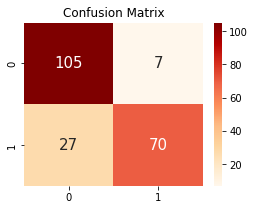

In [ ]:
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

# 4. KEYWORD EXTRACTION


In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)

[(3.4374711457104437, 662),
 (3.1434528850629397, 905),
 (1.847387009686865, 972),
 (1.5327558324832096, 897),
 (1.4079829303502713, 1614),
 (1.3091761094058032, 138),
 (1.3008206477553494, 768),
 (1.235340942396827, 1371),
 (1.2181594943525298, 1286),
 (1.1571329189125414, 1617),
 (1.0587180883311125, 1308),
 (1.0585045523424186, 1615),
 (0.9914753096534933, 320),
 (0.9846871014913894, 719),
 (0.9740030528602972, 335),
 (0.9536239631125284, 1915),
 (0.9375545456203346, 730),
 (0.9361578953215204, 515),
 (0.9258300262376423, 994),
 (0.8983220449092494, 1557),
 (0.8859256183935087, 1225),
 (0.8669989928673777, 37),
 (0.7602364399269966, 548),
 (0.7313201807415945, 996),
 (0.7089694576742506, 645),
 (0.7023991316483199, 1919),
 (0.699111159604071, 1774),
 (0.6932806189695503, 86),
 (0.679585485689938, 1478),
 (0.6663221857951798, 1131),
 (0.6468939560310603, 861),
 (0.6382717622961083, 718),
 (0.614792910788707, 672),
 (0.6086677930633431, 1610),
 (0.5935222110531114, 1877),
 (0.59298996

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{1265: '오늘',
 1959: '포장',
 768: '복숭아',
 877: '상태',
 905: '서비스',
 1610: '주문',
 39: '감사',
 101: '계속',
 1408: '이용',
 580: '메뉴',
 1764: '최공',
 495: '리뷰',
 1092: '쓰기',
 1449: '일반',
 174: '그대로',
 662: '밀크',
 1557: '정말',
 1690: '쫀득쫀득',
 706: '배달',
 1536: '전부',
 1343: '원래',
 181: '그릭',
 1823: '커트',
 1029: '시나',
 230: '깜짝',
 890: '생각',
 1554: '정도',
 366: '대박',
 2064: '혜자',
 1617: '주신',
 972: '수박',
 1614: '주스',
 1268: '오래오래',
 730: '번창',
 2055: '허버허버',
 861: '사진',
 1915: '티라미수',
 1487: '자체',
 2049: '행복',
 1308: '요거트',
 1615: '주시',
 1999: '하나',
 1129: '안시',
 1632: '줜맛',
 1885: '탱커',
 456: '때매',
 1371: '음료',
 548: '맛집',
 1486: '자주',
 1241: '역시',
 2030: '한주',
 848: '사랑',
 1062: '신비',
 335: '달달',
 1275: '오분',
 1877: '타피오카',
 1774: '추가',
 897: '생크림',
 1128: '안보',
 859: '사이즈',
 513: '마시기',
 509: '마무리',
 138: '과일',
 1142: '알갱이',
 1542: '전화',
 1659: '직접',
 1992: '픽업',
 915: '설명',
 2045: '해주시',
 1897: '토핑',
 719: '버블티',
 1996: '필요',
 1696: '쫄깃',
 1048: '식감',
 1298: '완전',
 699: '방금',
 847: '사람',
 975: '수저

* 긍정 키워드를 추출합니다.

In [ ]:
positive_words = {}
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    positive_words[invert_index_vectorizer[coef[1]]] = int(coef[0] * 100)

밀크 3.4374711457104437
서비스 3.1434528850629397
수박 1.847387009686865
생크림 1.5327558324832096
주스 1.4079829303502713
과일 1.3091761094058032
복숭아 1.3008206477553494
음료 1.235340942396827
오키나와 1.2181594943525298
주신 1.1571329189125414
요거트 1.0587180883311125
주시 1.0585045523424186
다음 0.9914753096534933
버블티 0.9846871014913894
달달 0.9740030528602972
티라미수 0.9536239631125284
번창 0.9375545456203346
마약 0.9361578953215204
스누피 0.9258300262376423
정말 0.8983220449092494


* 부정 키워드를 추출합니다.

In [ ]:
negative_words = {}
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    negative_words[invert_index_vectorizer[coef[1]]] = int(-(coef[0]) * 100)

커피 -1.3969223401518163
빙수 -1.38111545065833
케이크 -1.1554864552011614
얼음 -1.1231716851829985
아이스크림 -0.9784760482578464
팥빙수 -0.8713384138572384
초코 -0.8313646171515927
달라 -0.8070722732077498
야채 -0.802549505690982
이벤트 -0.798196223400767
샌드위치 -0.7684704510037795
크로와상 -0.7596502457086579
스노우 -0.7587161262513604
크림 -0.7269472720176379
스콘 -0.7162366020821647
시간 -0.7095396452794577
양은 -0.7070263627684472
사항 -0.6994421167279355
샐러드 -0.6925292745103696
가지 -0.6747235607122457


# 5. WORD CLOUD

In [ ]:
from wordcloud import WordCloud

* 긍정 키워드를 표현하는 wordcloud를 생성합니다.

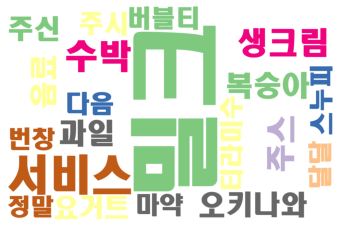

In [ ]:
wordcloud = WordCloud(font_path = '/content/drive/MyDrive/AI Spark/HMKMRHD.TTF',
                      background_color='white',
                      colormap = "Accent_r", 
                      width=3000, 
                      height=2000).generate_from_frequencies(positive_words) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

* 부정 키워드를 표현하는 wordcloud를 생성합니다.

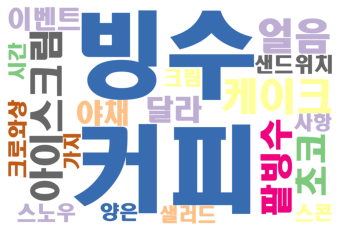

In [ ]:
wordcloud = WordCloud(font_path = '/content/drive/MyDrive/AI Spark/HMKMRHD.TTF',
                      background_color='white',
                      colormap = "Accent_r", 
                      width=3000, 
                      height=2000).generate_from_frequencies(negative_words) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

* 모델을 저장합니다.

In [ ]:
import joblib

joblib(lr, '/content/drive/MyDrive/AI Spark/fileName.pkl')